In [2]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics
import matplotlib.pyplot as plt
%matplotlib inline


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [ ]:

%%writefile get_data.sh
mkdir -p data
if [ ! -f data/admissions.csv ]; then
  wget -O data/admissions.csv https://www.dropbox.com/scl/fi/bjcutl89xibf3r99yc8q0/admissions.csv?rlkey=n36lo0iffob0j73rys1vf3cn5&dl=0
fi
if [ ! -f data/bank.csv ]; then
  wget -O data/bank.csv https://www.dropbox.com/scl/fi/ukxqbfalj3rx5nyzven9j/bank.csv?rlkey=hfrax97bwt45dq9ag0jdpsgsp&dl=0
fi
if [ ! -f data/evergreen_sites.tsv ]; then
  wget -O data/evergreen_sites.tsv https://www.dropbox.com/scl/fi/c310bmln3pv8vdlbweo1k/evergreen_sites.tsv?rlkey=kie6jqkr4klw26b9gnowinyd9&dl=0
fi
if [ ! -f data/glass.csv ]; then
  wget -O data/glass.csv https://www.dropbox.com/scl/fi/dv522a61am4dsc3vkfp4p/glass.csv?rlkey=6l9v685sw98plzj2myvtjpes6&dl=0
fi
if [ ! -f data/titanic.csv ]; then
  wget -O data/titanic.csv https://www.dropbox.com/scl/fi/csnl3vpbq94i4vxpfoe2w/titanic.csv?rlkey=6q576c7lp0e25tb5khvz066l9&dl=0
fi

In [ ]:
!bash get_data.sh

In [ ]:

admissions = pd.read_csv('./data/admissions.csv')
admissions.head()

In [3]:
admissions = admissions.dropna()
# Get dummy variables for prestige.
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix='prestige'))

In [4]:
admissions.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [16]:
admissions.shape

(397, 10)

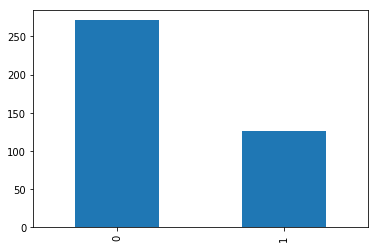

In [15]:
admissions.admit.value_counts().plot(kind='bar')

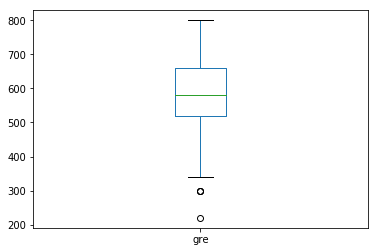

In [5]:
admissions.gre.plot(kind='box')

In [6]:
def gre_calc(gre):
    if gre <400:
        new_gre = 1
    elif 400<gre <=500 :
        new_gre = 2
    elif 500<gre <=600 :
        new_gre = 3
    elif 600<gre <=700 :
        new_gre = 4
    elif 700<gre <=800 :
        new_gre = 5
    else:
        new_gre = 6
    return new_gre

admissions['new_gre'] = admissions['gre'].apply(gre_calc)

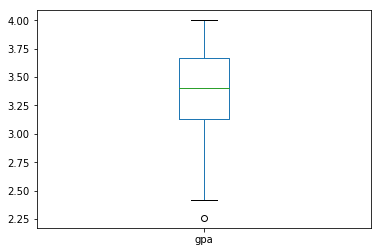

In [7]:
admissions.gpa.plot(kind='box')

In [8]:
def gpa_calc(gpa):
    if gpa <=2.75:
        new_gpa = 1
    elif 2.75<gpa <=3 :
        new_gpa = 2
    elif 3<gpa <=3.25 :
        new_gpa = 3
    elif 3.25<gpa <=3.5 :
        new_gpa = 4
    elif 3.5<gpa <=3.75 :
        new_gpa = 5
    else:
        new_gpa = 6
    return new_gpa

admissions['new_gpa'] = admissions['gpa'].apply(gpa_calc)

In [9]:
admissions.head(3)

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,new_gre,new_gpa
0,0,380.0,3.61,3.0,0,0,1,0,1,5
1,1,660.0,3.67,3.0,0,0,1,0,4,5
2,1,800.0,4.00,1.0,1,0,0,0,5,6


In [10]:
admissions.columns

Index(['admit', 'gre', 'gpa', 'prestige', 'prestige_1.0', 'prestige_2.0',
       'prestige_3.0', 'prestige_4.0', 'new_gre', 'new_gpa'],
      dtype='object')

In [11]:
X = admissions[['gpa','prestige_1.0', 'prestige_2.0','prestige_3.0', 'prestige_4.0', 'new_gre', 'new_gpa']]
y = admissions['admit']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=99)
logit = linear_model.LogisticRegression().fit(X_train, y_train)
y_pred=logit.predict(X_test)

/Users/ghorbaj/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
metrics.confusion_matrix(y_test, y_pred)

array([[63,  2],
       [29,  6]])

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier(max_depth=5, min_s)
# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred_tree=tree_model.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_tree)

array([[50, 15],
       [22, 13]])

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        65
           1       0.75      0.17      0.28        35

    accuracy                           0.69       100
   macro avg       0.72      0.57      0.54       100
weighted avg       0.71      0.69      0.62       100

